# Importing Libraries for Visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
labchartevents = pd.read_csv("sepsis_labchartevents.csv")
sepsis_patients = pd.read_csv("sepsis_patient_data.csv")
sepsis_presence = pd.read_csv("sepsis_presence.csv")
sepsis_prediction_dataset = pd.read_csv("sepsis_prediction_dataset.csv")
print("Files Loading Successful")

Files Loading Successful


In [3]:
dataframes = {
    "labchartevents": labchartevents,
    "sepsis_patients": sepsis_patients,
    "sepsis_presence": sepsis_presence,
    "sepsis_prediction_dataset": sepsis_prediction_dataset}
for name, df in dataframes.items():
    print(f"\033[1mColumns in {name}:\033[0m")
    print(df.columns.tolist())
    print("-" * 80)

Columns in labchartevents:
['subject_id', 'hadm_id', 'Bicarbonate', 'C-Reactive Protein', 'Creatinine', 'Lactate', 'Platelet Count', 'White Blood Cells', 'Blood Pressure', 'Brain', 'GCS', 'Glucose', 'Heart Rate', 'Oxygen', 'Respiratory', 'Temperature']
--------------------------------------------------------------------------------
Columns in sepsis_patients:
['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'hospital_expire_flag', 'hospital_stay_hours', 'gender', 'anchor_age', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'icu_stay_hours', 'sepsis']
--------------------------------------------------------------------------------
Columns in sepsis_presence:
['subject_id', 'hadm_id', 'sepsis']
--------------------------------------------------------------------------------
Columns in sepsis_prediction_dataset:
['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'adm

# Exploratory Data Analysis (EDA)

## LabChart Events

**Distribution of Key Lab Features**

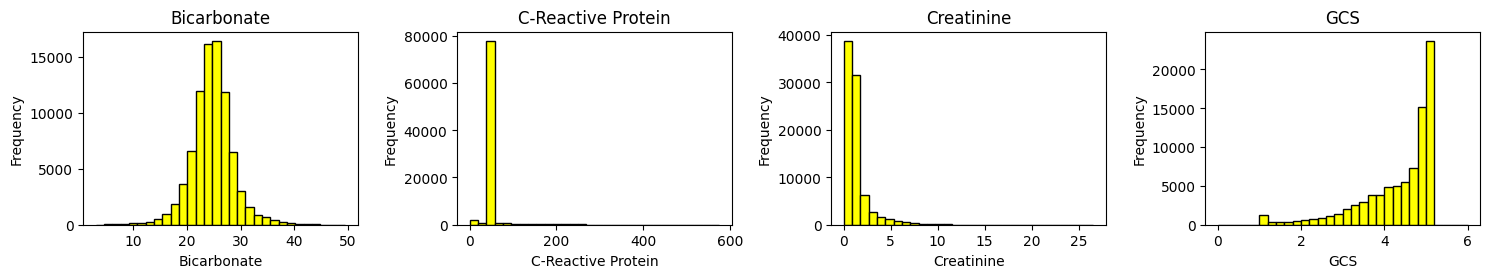

In [4]:
features = ['Bicarbonate', 'C-Reactive Protein', 'Creatinine', 
            'GCS']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, start=1):
    plt.subplot(4, 4, i)
    if feature in labchartevents.columns:
        labchartevents[feature].hist(bins=30, color='yellow', edgecolor='black')
        plt.title(feature)
        plt.xlabel(feature)
        plt.grid(False)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Violinplot for Outlier Analysis**

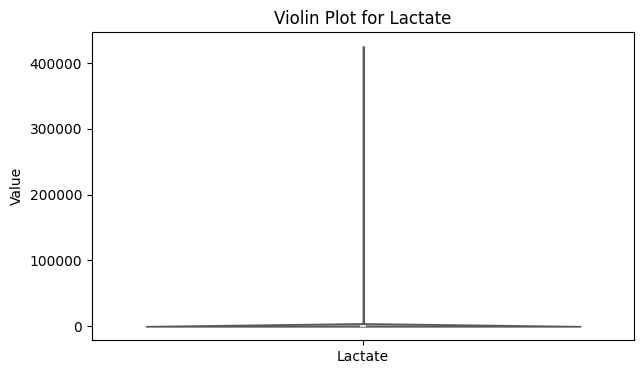

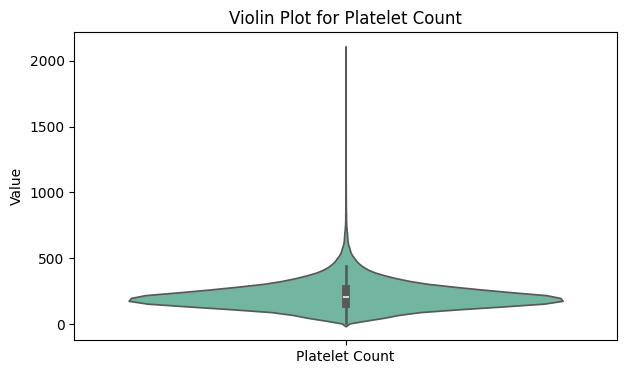

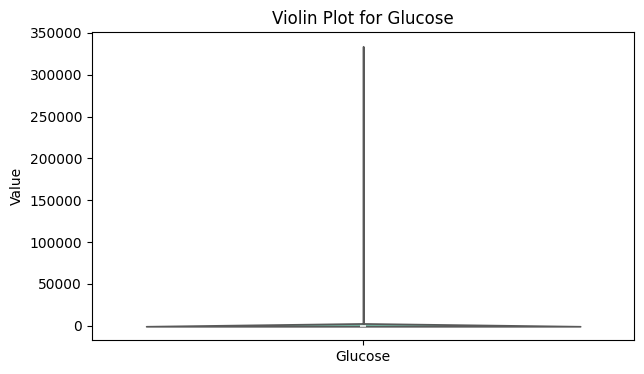

In [5]:
features = ['Lactate', 'Platelet Count', 'Glucose']
for feature in features:
    if feature in labchartevents.columns:
        plt.figure(figsize=(7, 4))
        sns.violinplot(data=labchartevents[[feature]], palette="Set2")
        plt.title(f'Violin Plot for {feature}')
        plt.ylabel('Value')
        plt.show()

**Correlation Heatmap of Lab and Chart Events**

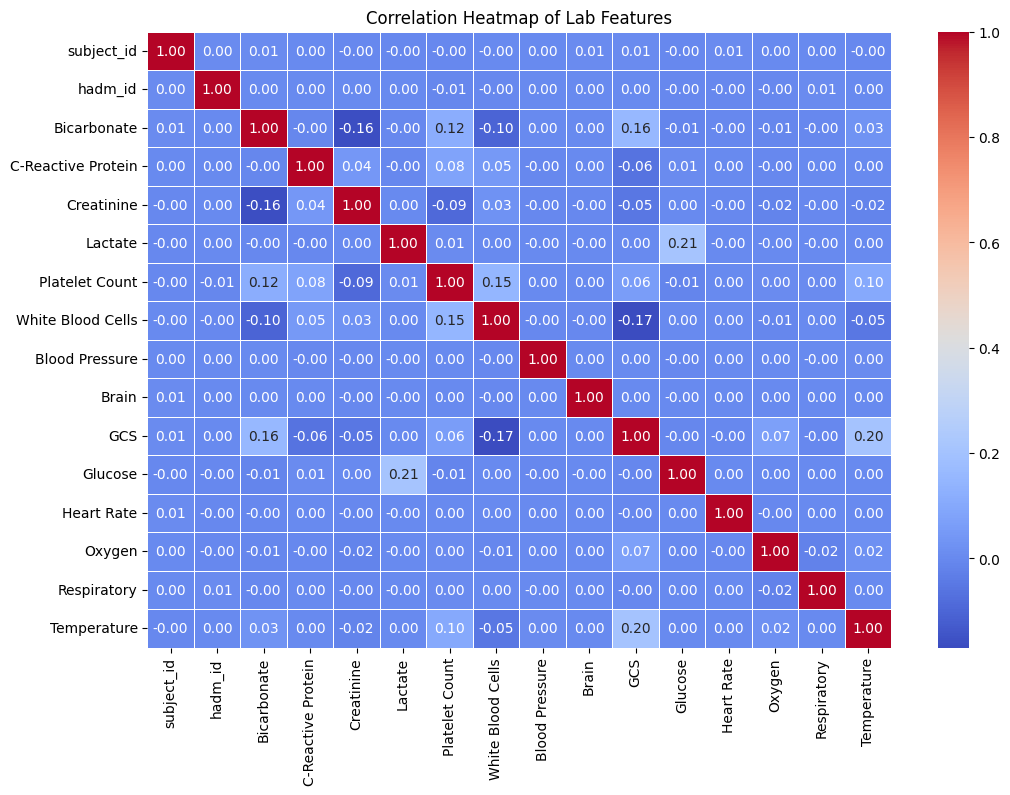

In [16]:
correlation_matrix = labchartevents.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Lab Features')
plt.show()

## Sepsis_patients

In [8]:
sepsis_count = sepsis_patients['sepsis'].value_counts()
sepsis_count

sepsis
0.0    529165
1.0     49152
Name: count, dtype: int64

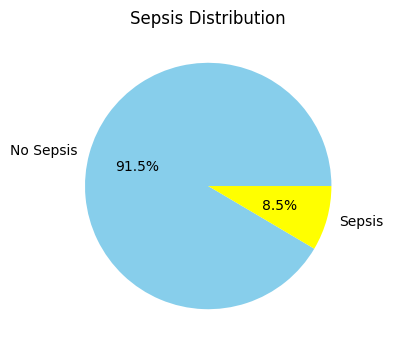

In [13]:
plt.figure(figsize=(4, 4))
sepsis_count.plot(kind='pie', autopct='%1.1f%%', labels=['No Sepsis', 'Sepsis'], colors=['skyblue', 'yellow'])
plt.title('Sepsis Distribution')
plt.ylabel('')
plt.show()

**Age Distribution**

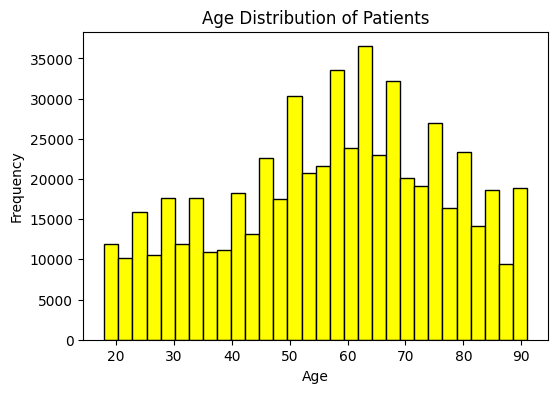

In [22]:
plt.figure(figsize=(6, 4))
sepsis_patients['anchor_age'].hist(bins=30, color='yellow', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## sepsis_prediction_dataset

**Sepsis Distribution**

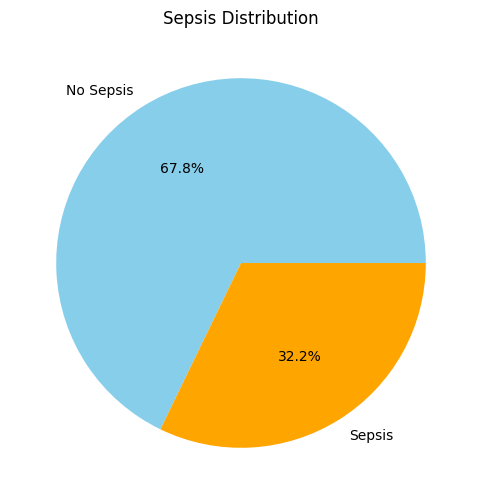

In [36]:
sepsis_count = sepsis_prediction_dataset['sepsis'].value_counts()
plt.figure(figsize=(6, 6))
sepsis_count.plot(kind='pie', autopct='%1.1f%%', labels=['No Sepsis', 'Sepsis'], colors=['skyblue', 'orange'])
plt.title('Sepsis Distribution')
plt.ylabel('')
plt.show()

**Age Distribution in Final Dataset**

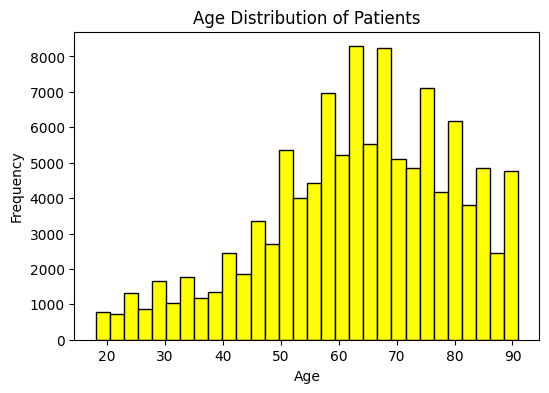

In [37]:
plt.figure(figsize=(6, 4))
sepsis_prediction_dataset['anchor_age'].hist(bins=30, color='yellow', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Sepsis by Admission Type**

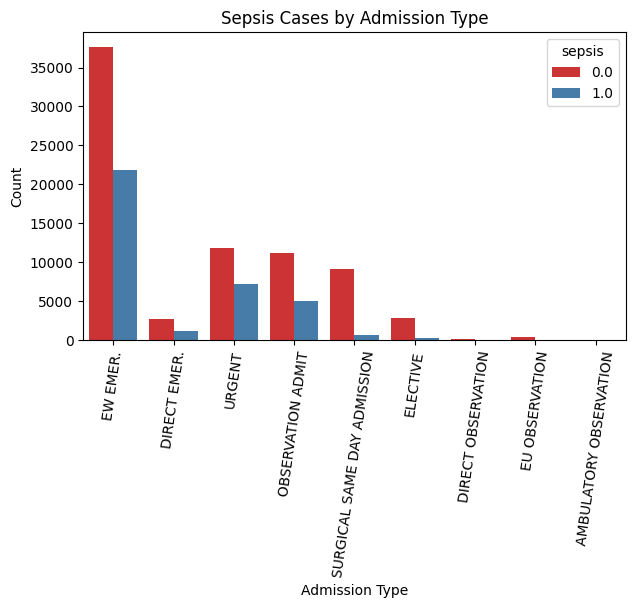

In [16]:
plt.figure(figsize=(7, 4))
sns.countplot(data=sepsis_prediction_dataset, x='admission_type', hue='sepsis', palette='Set1')
plt.title('Sepsis Cases by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=82)
plt.show()

**Sepsis by Admission Location**

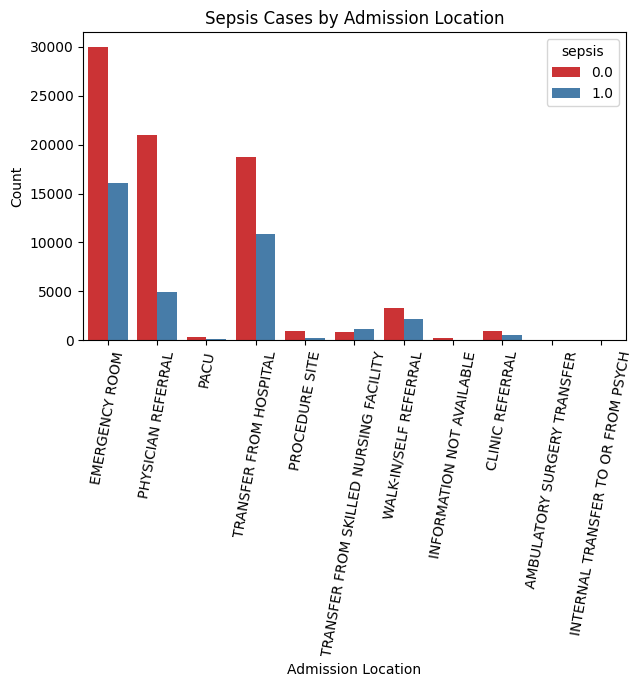

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(data=sepsis_prediction_dataset, x='admission_location', hue='sepsis', palette='Set1')
plt.title('Sepsis Cases by Admission Location')
plt.xlabel('Admission Location')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

**Sepsis by ICU stay hours**

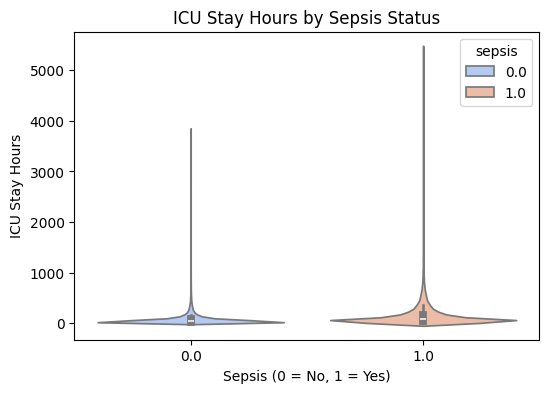

In [23]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=sepsis_prediction_dataset, x='sepsis', y='icu_stay_hours',hue='sepsis', palette='coolwarm')
plt.title('ICU Stay Hours by Sepsis Status')
plt.xlabel('Sepsis (0 = No, 1 = Yes)')
plt.ylabel('ICU Stay Hours')
plt.show()

**Sepsis by Insurance Type**

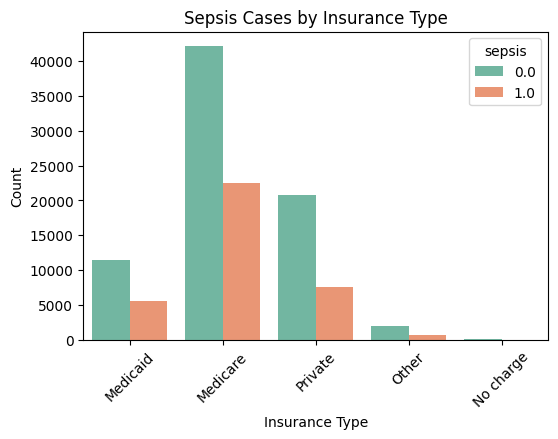

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=sepsis_prediction_dataset, x='insurance', hue='sepsis', palette='Set2')
plt.title('Sepsis Cases by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

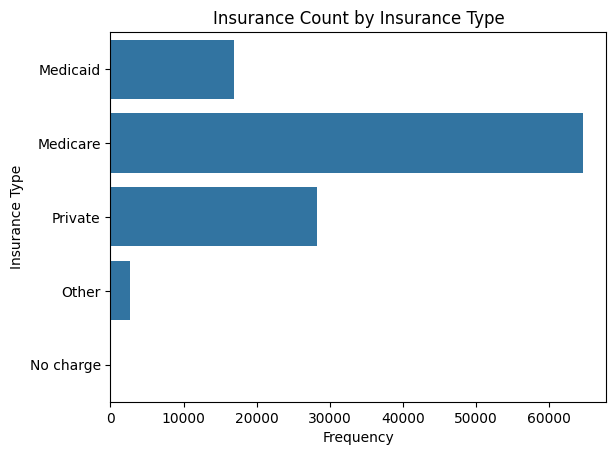

In [33]:
sns.countplot(sepsis_prediction_dataset['insurance'])
plt.title('Insurance Count by Insurance Type')
plt.xlabel('Frequency')
plt.ylabel('Insurance Type')
plt.show()

**Sepsis By Gender**

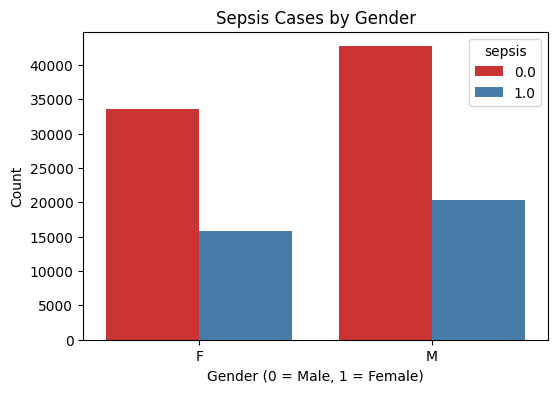

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(data=sepsis_prediction_dataset, x='gender', hue='sepsis', palette='Set1')
plt.title('Sepsis Cases by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

**Sepsis By Hospital Stay Duration**

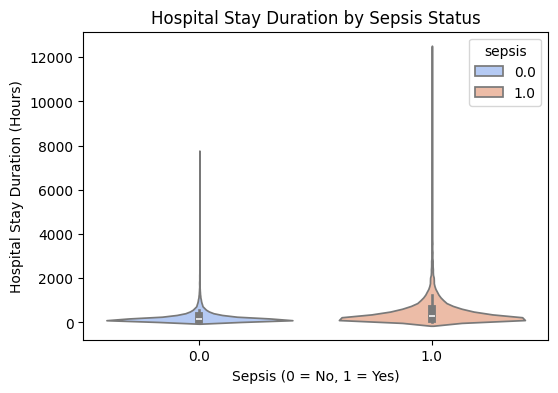

In [39]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=sepsis_prediction_dataset, x='sepsis', y='hospital_stay_hours',hue= 'sepsis', palette='coolwarm')
plt.title('Hospital Stay Duration by Sepsis Status')
plt.xlabel('Sepsis (0 = No, 1 = Yes)')
plt.ylabel('Hospital Stay Duration (Hours)')
plt.show()

# Advance Charts

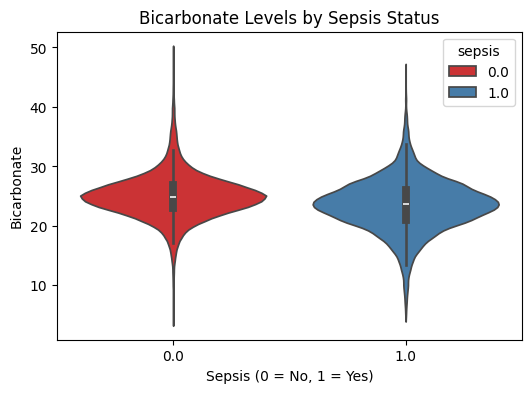

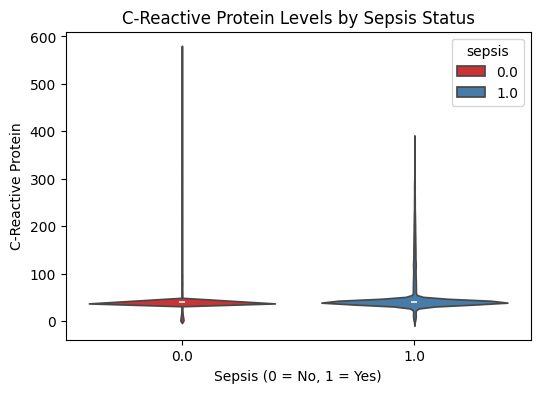

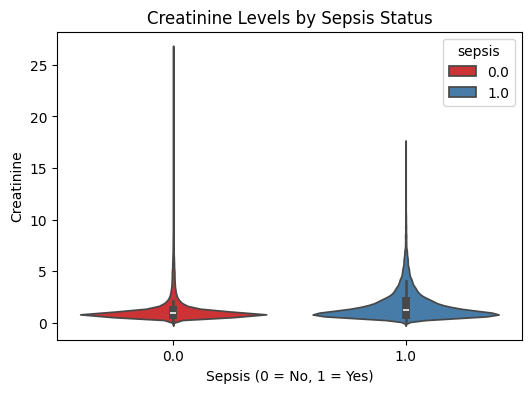

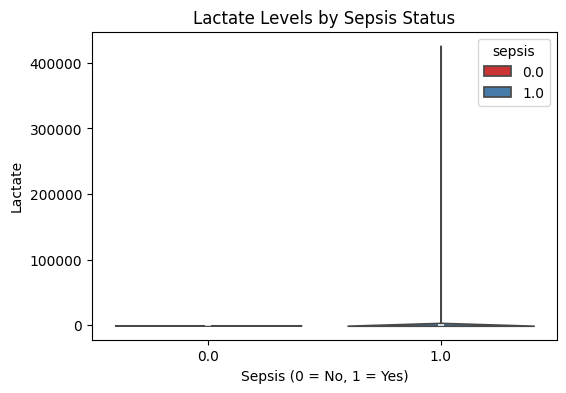

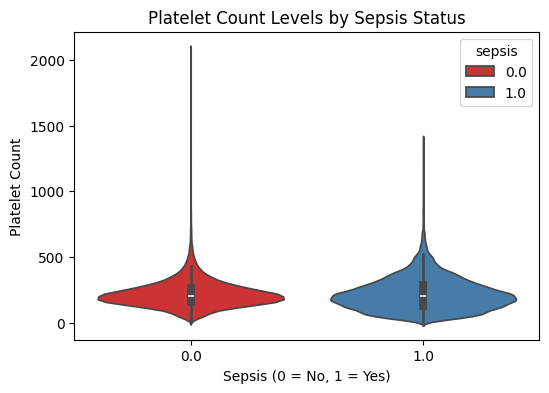

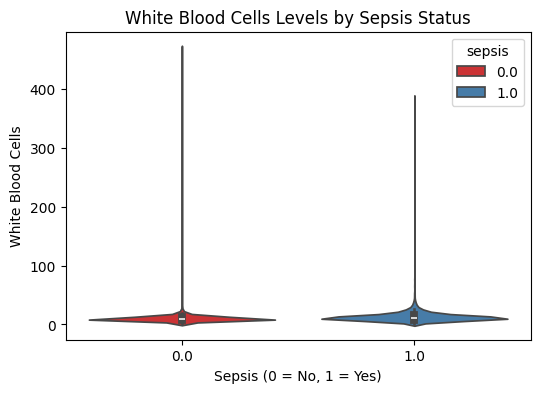

In [42]:
blood_parameters = ['Bicarbonate', 'C-Reactive Protein', 'Creatinine', 'Lactate', 
                    'Platelet Count', 'White Blood Cells']

for param in blood_parameters:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=sepsis_prediction_dataset, x='sepsis', y=param, hue='sepsis', palette='Set1')
    plt.title(f'{param} Levels by Sepsis Status')
    plt.xlabel('Sepsis (0 = No, 1 = Yes)')
    plt.ylabel(param)
    plt.show()

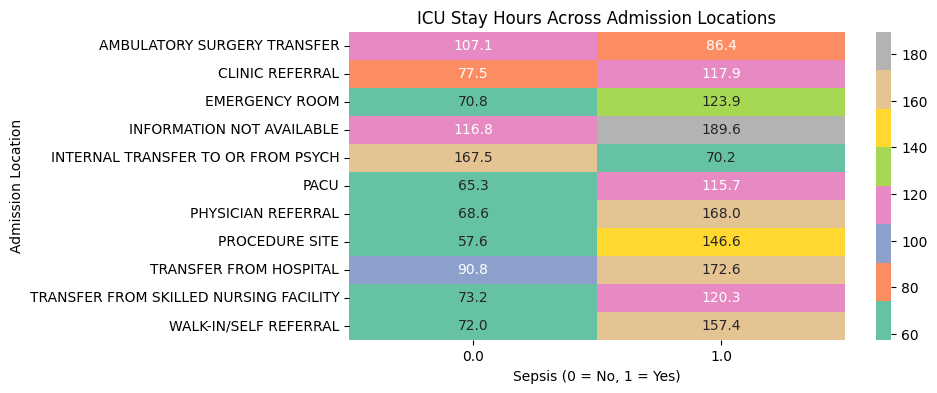

In [48]:
pivot_icu = sepsis_prediction_dataset.pivot_table(values='icu_stay_hours', index='admission_location', columns='sepsis', aggfunc='mean')

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_icu, annot=True, fmt='.1f', cmap='Set2')
plt.title('ICU Stay Hours Across Admission Locations')
plt.xlabel('Sepsis (0 = No, 1 = Yes)')
plt.ylabel('Admission Location')
plt.show()

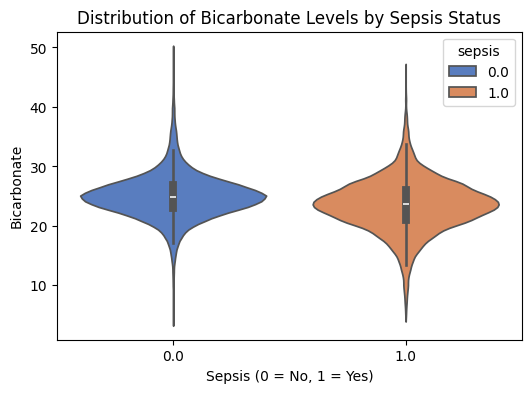

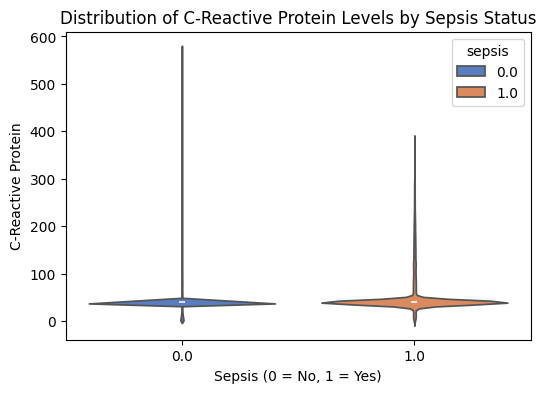

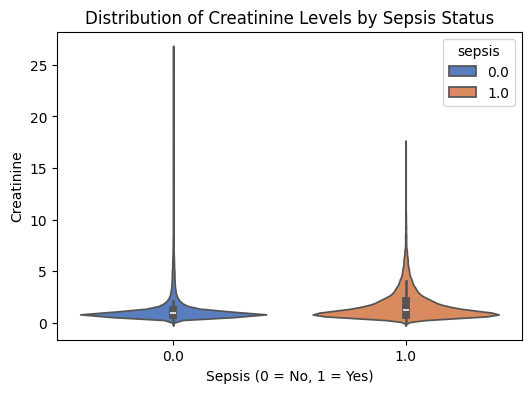

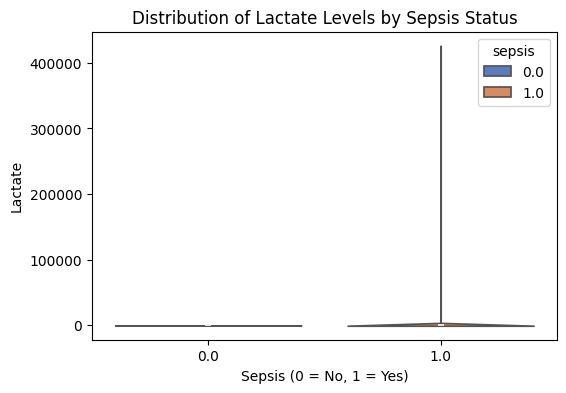

In [46]:
biomarkers = ['Bicarbonate', 'C-Reactive Protein', 'Creatinine', 'Lactate']

for biomarker in biomarkers:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=sepsis_prediction_dataset, x='sepsis', y=biomarker,hue='sepsis', palette='muted')
    plt.title(f'Distribution of {biomarker} Levels by Sepsis Status')
    plt.xlabel('Sepsis (0 = No, 1 = Yes)')
    plt.ylabel(biomarker)
    plt.show()